In [1]:
import pandas as pd

data_path = 'dataset/train/dataframemulticlasse.csv'
test_path = 'dataset/test/dataframemulticlasse_test.csv'

df_train = pd.read_csv(data_path)
df_test = pd.read_csv(test_path)

train_data = df_train['text']
train_labels = df_train.label

test_data = df_test.text
test_labels = df_test.label


In [2]:
print(train_data.head())
print(test_data.head())
print(test_labels)

0    La possibilità di assistere a parate culturali...
1    Partecipare a workshop di mindfulness o medita...
2    Esplorare parchi divertimenti tematici o attra...
3    La visita a centri di ricerca marina o laborat...
4    Partecipare a corsi di cucina etnica permette ...
Name: text, dtype: object
0    Gustare il gelato artigianale a Firenze, in un...
1    Esplorare i mercati galleggianti della Thailan...
2    Assaggiare il sushi fresco a Tokyo, direttamen...
3    Degustare il formaggio francese in una fromage...
4    Assaporare la paella valenciana in Spagna, con...
Name: text, dtype: object
0          travel and food
1          travel and food
2          travel and food
3          travel and food
4          travel and food
              ...         
475    cultural activities
476    cultural activities
477    cultural activities
478    cultural activities
479    cultural activities
Name: label, Length: 480, dtype: object


In [2]:
y_train = []

for label in train_labels:
    if label=='travel and food':
        y_train.append([1, 0, 0])
    elif label=='shopping':
        y_train.append([0, 1, 0])
    else:
        y_train.append([0, 0, 1])

print(len(y_train))



2400


In [3]:
y_test = []

for label in test_labels:
    if label=='travel and food':
        y_test.append([1, 0, 0])
    elif label=='shopping':
        y_test.append([0, 1, 0])
    else:
        y_test.append([0, 0, 1])

print(len(y_test))

480


In [5]:
train_data.head()
test_data.head()

0    Gustare il gelato artigianale a Firenze, in un...
1    Esplorare i mercati galleggianti della Thailan...
2    Assaggiare il sushi fresco a Tokyo, direttamen...
3    Degustare il formaggio francese in una fromage...
4    Assaporare la paella valenciana in Spagna, con...
Name: text, dtype: object

In [4]:
#Pre-processamento dei dati il metodo riceve in input una stringa e ne restituisce il suo pre-processamento
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

def preprocess_text(text):
    #Lower text
    tokens = word_tokenize(text.lower())
    #Rimozione stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('italian')]
    #Lemmatizzazione
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    #Join lemmatizzazione del testo
    processed_text = ' '.join(lemmatized_tokens)
    #Eliminazione punteggiatura
    return processed_text.translate(str.maketrans('','', string.punctuation))

In [5]:
x_train = train_data.apply(preprocess_text)
x_test = test_data.apply(preprocess_text)

In [21]:
print(x_train[0])

possibilità assistere parate culturali sfilate costumi tradizionali offre spettacolo vibrante colorato 


In [6]:
#Vettorizzazione del testo tramite tokenizzazione
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 50
max_words = 10000


#Train
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))


x_train = pad_sequences(sequences, maxlen=maxlen)
y_train = np.asarray(y_train)
indices = np.arange(x_train.shape[0])

np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]


#Test
tokenizer.fit_on_texts(x_test)
sequences = tokenizer.texts_to_sequences(x_test)
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(y_test)
indices = np.arange(x_test.shape[0])

np.random.shuffle(indices)
x_test = x_test[indices]
y_test = y_test[indices]



2024-04-15 10:24:34.934289: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-15 10:24:34.972620: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 10:24:34.972649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 10:24:34.973617: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-15 10:24:34.979499: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-15 10:24:34.980270: I tensorflow/core/platform/cpu_feature_guard.cc:1

Found 3919 unique tokens
Found 4573 unique tokens


In [7]:
print(x_train[0])
print(y_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  66   1 665 762  11 664  38 269]
[0 1 0]


In [8]:
print(x_test[0])
print(x_test[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 154 168 724 843  66  72 132]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 154 168 724 843  66  72 132]


In [51]:
#Definizione del modello e training con/senza word embedding

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=100, batch_size=48, validation_data=(x_test, y_test))

Epoch 1/100
50/50 [==============================] - 1s 6ms/step - loss: 57.7213 - acc: 0.3562 - val_loss: 31.4119 - val_acc: 0.4521
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 19.3110 - acc: 0.3963 - val_loss: 18.6374 - val_acc: 0.2438
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 13.5844 - acc: 0.4267 - val_loss: 21.8207 - val_acc: 0.2042
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 9.6498 - acc: 0.4650 - val_loss: 14.9767 - val_acc: 0.4021
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 7.9024 - acc: 0.4708 - val_loss: 12.5779 - val_acc: 0.3354
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 6.1975 - acc: 0.5183 - val_loss: 10.9874 - val_acc: 0.3958
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 5.1058 - acc: 0.5400 - val_loss: 13.4741 - val_acc: 0.2396
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 

In [52]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (48, 256)                 13056     
                                                                 
 dense_44 (Dense)            (48, 64)                  16448     
                                                                 
 dense_45 (Dense)            (48, 3)                   195       
                                                                 
Total params: 29699 (116.01 KB)
Trainable params: 29699 (116.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


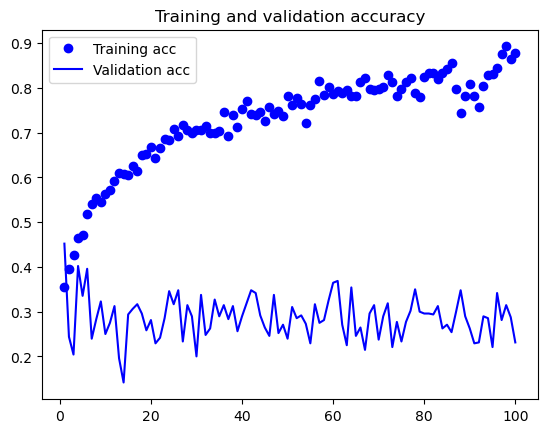

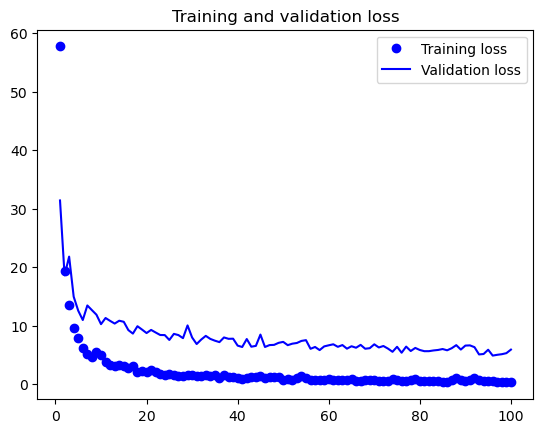

In [53]:
#Tracciamento dei risultati
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [54]:
#Salvataggio del modello

model.save('multiclassification.keras')

In [55]:
model.save('multiclassification.h5')

/home/diceglieg/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [98]:
#Test

#load model
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

loaded_model = load_model('multiclassification.h5')

sentence = input("Enter the sentence: ")
sequence = preprocess_text(sentence)
sequence = tokenizer.texts_to_sequences([sequence])
test = pad_sequences(sequence, maxlen=50)
yhat = loaded_model.predict(test)

percentages = [pred * 100 for pred in yhat]

#Provare il curry piccante in India, con una miriade di spezie che esplodono in bocca.
print("Travel and food; Shopping; Cultural activities")
print([out for out in percentages])


1/1 [==============================] - 0s 52ms/step
Travel and food; Shopping; Cultural activities
[array([77.570816 ,  0.2972364, 22.13194  ], dtype=float32)]


In [99]:
from huggingface_hub import notebook_login

notebook_login()

In [106]:
from transformers import PushToHubCallback


push_to_hub_callback = PushToHubCallback(
    output_dir="/home/diceglieg/NextGenTech/projects/ngt learning/multiclass classification/",
    tokenizer=tokenizer,
    hub_model_id="girolamodiceglie/multiclass-classification",
)

OSError: Tried to clone a repository in a non-empty folder that isn't a git repository ('/home/diceglieg/NextGenTech/projects/ngt learning/multiclass classification'). If you really want to do this, do it manually:
 cd /home/diceglieg/NextGenTech/projects/ngt learning/multiclass classification && git init && git remote add origin && git pull origin main
 or clone repo to a new folder and move your existing files there afterwards.